# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Importing python file HouseholdSpecializationModel
import HouseholdSpecializationModel as HSM
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt # baseline module

# Question 1

In [2]:

model = HSM.HouseholdSpecializationModelClass()
# Printing results when sigma=1

# code
x = [0.25,0.5,0.75]
z = [0.5,1,1.5]
#Made a for loop where the values of alpha and sigma are changed in each iteration
for i in range(3):
    for j in range(3):
        model.par.alpha = x[i]
        model.par.sigma =z[j]
        results = model.solve_discrete()
        
        print(results.HF/results.HM)

c:\Users\johan\OneDrive\Skrivebord\projects-2023-politgrammering-4\inauguralproject\HouseholdSpecializationModel.py:60: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))


0.5454545454545454
0.3076923076923077
0.21428571428571427
1.0
1.0
1.0
1.8333333333333333
3.25
4.666666666666667


When alpha=0.5, men and women are equally productive in the home. They therefore share work at home equally, since they also get the same wage in the labor market wF=wM. 

When alpha=0.25 men are more productive at home than women, women therefore work less than men at home (HF/HM)<1. 

When alpha=0.75 the opposite is true, women are more productive in the home than men, and therefore work more than men at home HF/FM>1 

When sigma increases, HF/HM decreases for alpha=0.25 and increases for alpha=0.75.  When it is easier to substitute between labor in the home, it makes sense to substitute towards the more productive of the man and the woman.


![](picture3.png)

# Question 2

Explain your code and procedure

0.22314355131420976
0.0
0.0
-0.11778303565638351
-0.2231435513142097
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


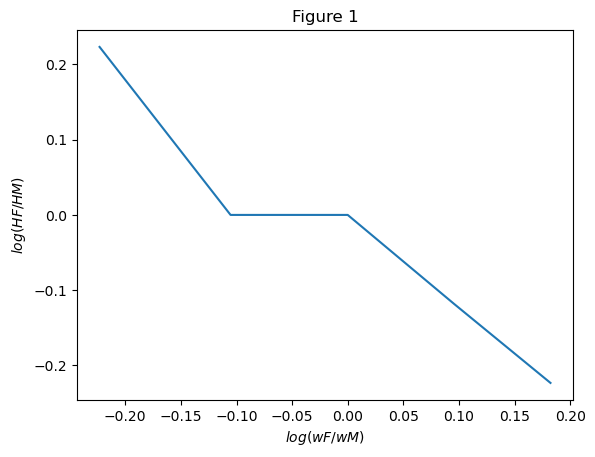

In [3]:
model.par.alpha=0.5
model.par.sigma=1

for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_discrete()
        
        print(np.log(results.HF/results.HM))

log_WF_WM=np.log(model.par.wF_vec)
print(log_WF_WM)

fig = plt.figure()


# b. plot
ax = fig.add_subplot(1,1,1)


ax.plot(log_WF_WM,[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097])


ax.set_title('Figure 1')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');


The man’s wage wM is normalized to one, so the relative wage wF/wM is just the woman’s wage wF. When the man´s and woman´s wages are equal wF=wM, the relative wage is one, so the logaritm equals 0. Hence, negative values of log(wF/wM) reflect that wF < wM, and positive values of log(wF/wM) reflect that  wF > wM.  

The negative connection between log(wF/wM) and log(HF/HM) is intuitive. When the relative wage increases the opportunity cost of the woman working at home increases, since she can get a higher wage in the labor market.  The couple therefore choose to let the woman work more in the labor market and less in the home. 

It looks like the slope (the elasticity) is around beta1=–0.5. If the relative wage increases by one percent, the relative worktime in the home decreases by one percent. 



# Question 3

In [4]:
model.solve()

model.par.alpha=0.5
model.par.sigma=1

# Append to ratios with each iteration
ratios = []
for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve()
        
        ratio = np.log(results.HF/results.HM) 
        print(ratio)
        ratios.append(ratio)

log_WF_WM=np.log(model.par.wF_vec)
print(ratios)
print(log_WF_WM)



0.1302833064818017
0.0002032018652815805
0.0
-0.00014064323889808965
-0.10338283086961382
[0.1302833064818017, 0.0002032018652815805, 0.0, -0.00014064323889808965, -0.10338283086961382]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


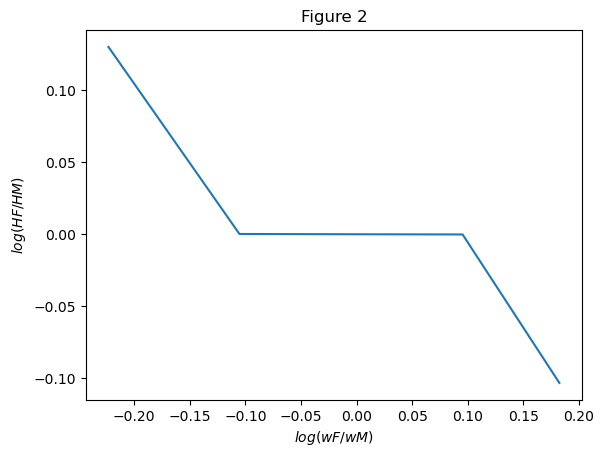

In [5]:
# code
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_WF_WM,ratios)

# axis information
ax.set_title('Figure 2')
ax.set_xlabel('$log(wF/wM)$')
ax.set_ylabel('$log(HF/HM)$');

 We change the model such that the choice of the household becomes continuous. We observe that the graph becomes more “symmetrical” when the choice is continuous. In the previous question the graph wasnt symmetrical, which we didnt expect. We would expect that HF/HM would increase with the same percentage point when wF/wM decreases as HF/HM would decrease when wF/wM increases.  


# Question 4

In [8]:
#Question 4

model.solve()
# (alpha, sigma) = (0.9820286655282875, 0.09997820455973572) 
# Changes manually for alpha={0.25, 0.5, 0.75} and Sigma={0.5, 1, 1.5}
model.par.alpha=0.9820286655282875
model.par.sigma=0.09997820455973572

#repeat the procees of iterating into the ratios loop
ratios = []
for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve()
        
        ratio = np.log(results.HF/results.HM) 
        ratios.append(ratio)

log_WF_WM=np.log(model.par.wF_vec)
print(ratios)

[0.42083220378046376, 0.4097086534588477, 0.3997007398829937, 0.3791130568282101, 0.3798075543712185]


In [7]:
#Insert the vector into the HouseHoldSpecializationModel.py file
model.run_regression()

namespace(LM_vec=array([0., 0., 0., 0., 0.]),
          HM_vec=array([0., 0., 0., 0., 0.]),
          LF_vec=array([0., 0., 0., 0., 0.]),
          HF_vec=array([0., 0., 0., 0., 0.]),
          beta0=0.302038538435161,
          beta1=-0.815808314557591,
          LM=5.414383784259819,
          HM=2.3415290412199816,
          LF=3.6640418862987914,
          HF=5.767187449664064)

Siminski and Yetsenga (2022) estimated beta0=0.4 and beta1=-0.1. We try out different values of alpha and sigma and report the estimated regression coefficients. In question 2 and 3 we assumed alpha=0.5 and sigma=1, and we get beta1=-0.464 and beta=0.0006. We get negative estimates og beta1 regardless of the values of alpha and sigma, wich makes sense. The results indicate that alpha should take a value which is larger than 0.5 from  beta0. It is estimated from the given values of sigma and alpha, that sigma should be under 1 when looking at beta 1, but it is possible that it is over 1. 

![](picture1.png)